<a href="https://colab.research.google.com/github/BALAJIHARIDASAN/Deep-Learning/blob/main/Activation_function_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Activation function - It brings non linearity to the model

# Types

#sigmoid
# tanh
# relu
# leaky relu
# elu
# prelu
# selu
# softmax


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as seaborn
import os

In [6]:
x = np.linspace(-10,10,100)

In [7]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [8]:
len(x)

100

In [18]:
def derivative(f, x, delta_x=1e-6):
    return (f(x + delta_x) - f(x))/(delta_x)

def plot_graph(x, f,
               ALPHA=0.6, 
               label_x = r"$x \rightarrow$", label_y=r"$act(x), act'(x) \rightarrow$", 
               title=None,
               LABEL_Y=None,
               LABEL_Y_DASH=None,
               filepath_of_plot="plot.png"):
    y = f(x)
    y_dash = derivative(f, x)
    plt.figure(figsize=(10,8))
    plt.axhline(y=0, color="black", linestyle="--", lw=2)
    plt.axvline(x=0, color="black", linestyle="--", lw=2)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)

    if (LABEL_Y != None) and (LABEL_Y_DASH != None):
        plt.plot(x, y, alpha=ALPHA, label=LABEL_Y)
        plt.plot(x, y_dash, alpha=ALPHA, label=LABEL_Y_DASH)
        plt.legend(fontsize=14)

    else:
        plt.plot(x, y, alpha=ALPHA)
        plt.plot(x, y_dash, alpha=ALPHA)

    plt.savefig(filepath_of_plot)
      



In [19]:
def sine(X):
  return np.sin(X)

In [20]:
sine(3.14/2)

0.9999996829318346

In [21]:
root_plot_dir = "root"
os.makedirs(root_plot_dir, exist_ok=True)


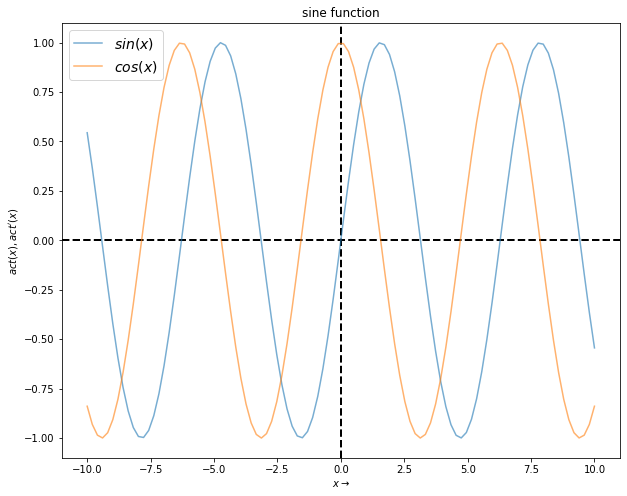

In [22]:
def plot_sine(x, path):
  plot_graph(x, f=sine, ALPHA=0.6,
               label_x = r"$x \rightarrow$",
               label_y=r"$act(x), act'(x)$",
               title="sine function",
               LABEL_Y=r"$sin(x)$",
               LABEL_Y_DASH=r"$cos(x)$",
               filepath_of_plot="plot.png")
  
plot_sine(x, os.path.join(root_plot_dir, "sine"))

In [23]:
def sigmoid(x):
    return tf.keras.activations.sigmoid(x)

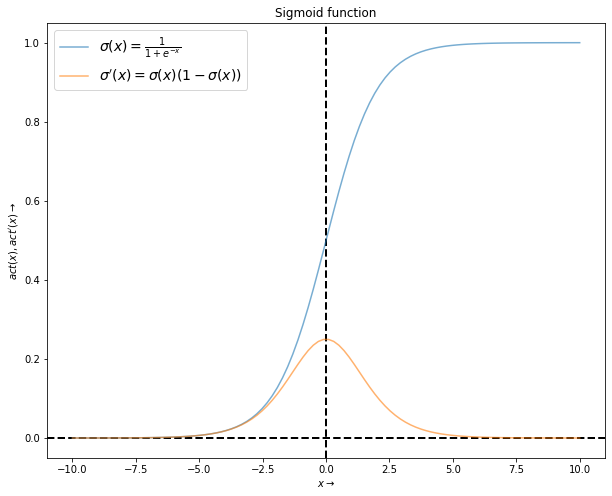

In [24]:

def plot_sigmoid(x, path):
    plot_graph(x, f=sigmoid, title="Sigmoid function", 
            LABEL_Y=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$", 
            LABEL_Y_DASH=r"$\sigma^\prime(x) = \sigma(x)(1-\sigma(x))$", 
            filepath_of_plot=path)

plot_sigmoid(x, os.path.join(root_plot_dir, "sigmoid"))

* The Sigmoid function is the most frequently used activation function in the beginning of deep learning. 

* It is a smoothing function that is easy to derive.

* In the sigmoid function, we can see that its output is in the open interval (0,1). We can think of probability, but in the strict sense, don't treat it as probability. The sigmoid function was more popular once. 

* It can be thought of as the firing rate of a neuron. In the middle where the slope is relatively large, it is the sensitive area of the neuron. On the sides where the slope is very gentle, it is the neuron's inhibitory area.

The function itself has certain defects:-

1. When the input is slightly away from the coordinate origin, the gradient of the function becomes very small, almost zero. In the process of neural network backpropagation, we all use the chain rule of differential to calculate the differential of each weight w. When the backpropagation passes through the sigmod function, the differential on this chain is very small. Moreover, it may pass through many sigmod functions, which will eventually cause the weight w to have little effect on the loss function, which is not conducive to the optimization of the weight. This The problem is called gradient saturation or gradient dispersion.

2. The function output is not centered on 0, which will reduce the efficiency of weight update.

3. The sigmod function performs exponential operations, which is slower for computers.


Advantages of Sigmoid Function : -

1. Smooth gradient, preventing “jumps” in output values.
2. Output values bound between 0 and 1, normalizing the output of each neuron.
3. Clear predictions, i.e very close to 1 or 0.


Sigmoid has three major disadvantages:
* Prone to gradient vanishing
* Function output is not zero-centered
* Power operations are relatively time consuming
